### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [21]:
data = pd.read_csv('./Data/vehicle.csv').dropna()

In [22]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

All the rows are having 813 values and so there are no missing values

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [27]:
data['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

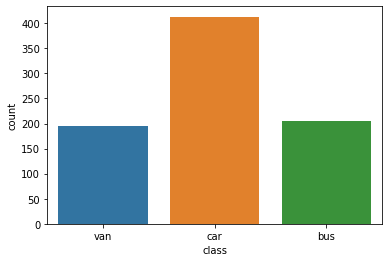

In [28]:
sns.countplot(data['class'])

### Check for any missing values in the data 

In [29]:
data.isnull().any(), data.isna().any()

(compactness                    False
 circularity                    False
 distance_circularity           False
 radius_ratio                   False
 pr.axis_aspect_ratio           False
 max.length_aspect_ratio        False
 scatter_ratio                  False
 elongatedness                  False
 pr.axis_rectangularity         False
 max.length_rectangularity      False
 scaled_variance                False
 scaled_variance.1              False
 scaled_radius_of_gyration      False
 scaled_radius_of_gyration.1    False
 skewness_about                 False
 skewness_about.1               False
 skewness_about.2               False
 hollows_ratio                  False
 class                          False
 dtype: bool, compactness                    False
 circularity                    False
 distance_circularity           False
 radius_ratio                   False
 pr.axis_aspect_ratio           False
 max.length_aspect_ratio        False
 scatter_ratio                  False

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [9]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()

In [31]:
data.drop(columns=['class'], inplace=True)

In [32]:
data_sc = sc.fit_transform(data)

In [33]:
data_sc.shape

(813, 18)

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [34]:
cluster_error = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [35]:
cluster_range = range( 1, 10)
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(data_sc)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_error.append( clusters.inertia_)
  
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_error} )
clusters_df.head()

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5741.138462
4,5,5186.753590


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

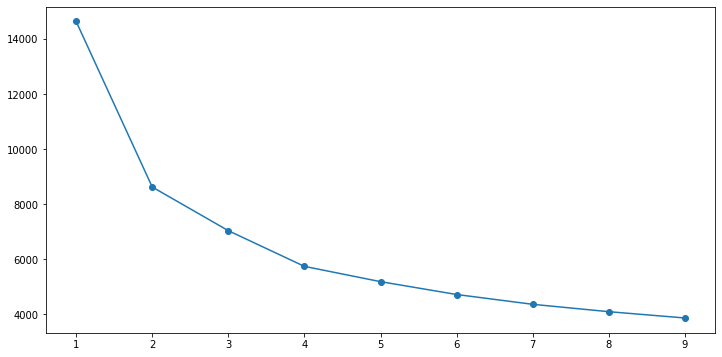

In [36]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Find out the optimal value of K

From the above curve, 4 may be a good value but the 4 groups don't seemed to be balanced where we find out the cluster. One of them is having 8 data points whereas the are other 3 are having more than 200 data points.

Therefore, taking 3 as optimal number of cluster

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [45]:
clusters = KMeans(3, n_init = 5)
clusters.fit(data_sc)
centroids = clusters.cluster_centers_
print(centroids)

[[-0.91987072 -0.52009251 -0.89320752 -1.06435572 -0.50042171 -0.2190738
  -0.7791213   0.86589322 -0.74535635 -0.484632   -0.78240328 -0.78341064
  -0.38498232  0.83878747 -0.09524349 -0.30171562 -1.05420601 -1.11069466]
 [-0.2339617  -0.57387481 -0.30776905 -0.03041322  0.2050726  -0.11653151
  -0.45904181  0.32506329 -0.48798836 -0.53604446 -0.41380935 -0.46366305
  -0.60155031 -0.61924057 -0.06177969  0.01066762  0.81278556  0.69897299]
 [ 1.13076532  1.17094237  1.19500584  1.01909505  0.21505188  0.34250798
   1.27180461 -1.19061224  1.27548416  1.09266768  1.22038121  1.28132727
   1.07954232 -0.02879497  0.16229031  0.26566456 -0.00535553  0.18380067]]


### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [46]:
centroids_df = pd.DataFrame(centroids, columns=data.columns)
centroids_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.919871,-0.520093,-0.893208,-1.064356,-0.500422,-0.219074,-0.779121,0.865893,-0.745356,-0.484632,-0.782403,-0.783411,-0.384982,0.838787,-0.095243,-0.301716,-1.054206,-1.110695
1,-0.233962,-0.573875,-0.307769,-0.030413,0.205073,-0.116532,-0.459042,0.325063,-0.487988,-0.536044,-0.413809,-0.463663,-0.601550,-0.619241,-0.061780,0.010668,0.812786,0.698973
2,1.130765,1.170942,1.195006,1.019095,0.215052,0.342508,1.271805,-1.190612,1.275484,1.092668,1.220381,1.281327,1.079542,-0.028795,0.162290,0.265665,-0.005356,0.183801


### Use kmeans.labels_ function to print out the labels of the classes

In [47]:
labels = clusters.labels_
labels

array([1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 1, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 0, 0, 0,
       0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 0, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 1,
       2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0,
       1, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 0,

In [48]:
data_sc_final = pd.DataFrame(data_sc)
data_sc_final['labels'] = labels
data_sc_final.groupby('labels').count()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
labels,,,,,,,,,,,,,,,,,,
0,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240,240
1,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313
2,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260,260


## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [49]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [50]:
a_df = pd.DataFrame(a)
ab_df = a_df.append(pd.DataFrame(b))
abc = ab_df.append(pd.DataFrame(c))

In [51]:
abc.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

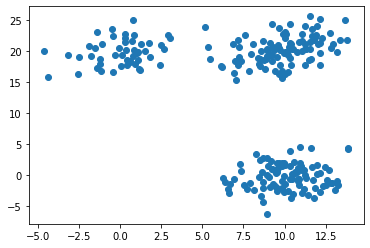

In [52]:
plt.scatter(x=abc[0], y=abc[1])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [53]:
Z = linkage(abc, 'ward')
cen, coph_dists = cophenet(Z , pdist(abc))
print("Ward", cen)

Ward 0.9536963071171022


### 12. Plot the dendrogram for the consolidated dataframe

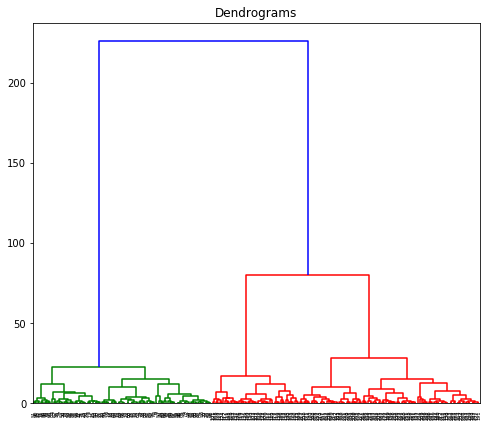

In [58]:
plt.figure(figsize=(8, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(abc, method='ward'))

In [59]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(abc)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
abc['labels'] = cluster.labels_

In [61]:
abc.groupby('labels').count()

,0,1
labels,,
0,101,101
1,100,100
2,49,49


### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

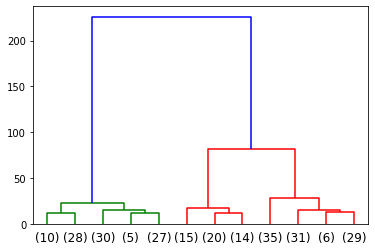

In [63]:
dend = sch.dendrogram(sch.linkage(abc, method='ward'), p=12, truncate_mode='lastp')

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 